In [1]:
 Introduction
This project, Bank Marketing Campaign Analysis, analyzes the Bank Marketing dataset from the UCI Machine Learning Repository. The dataset includes information on direct telemarketing campaigns conducted by a Portuguese banking institution to promote term deposit subscriptions.

Objectives:

Explore customer behavior and identify key factors influencing their decision to subscribe.

Preprocess and visualize the data for insights and model readiness.

Build and evaluate various machine learning models to predict whether a client will subscribe to a term deposit.

Determine feature importance to guide more effective future marketing strategies.

SyntaxError: invalid syntax (1265455369.py, line 2)

In [2]:
# Step 1: Import Libraries and Load Data
# This cell imports all the necessary Python libraries and loads the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Step 2: Initial Data Exploration
print("Dataset shape:", df.shape)
df.info()
df.describe()

Dataset shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


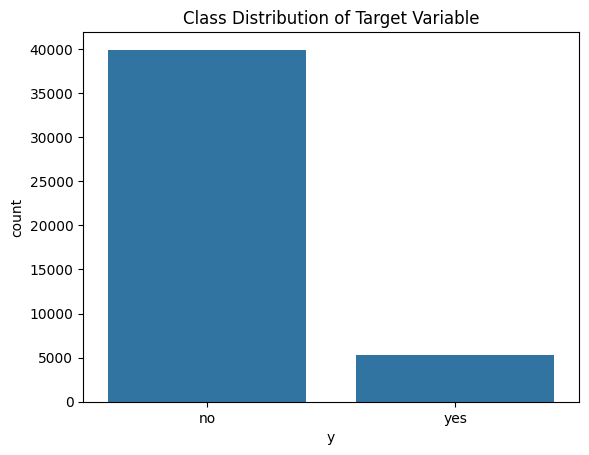

In [4]:
# Step 3: Check for Class Imbalance
sns.countplot(x='y', data=df)
plt.title("Class Distribution of Target Variable")
plt.show()

In [5]:
# Step 4: Remove Duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [6]:
# Step 5: Missing Values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


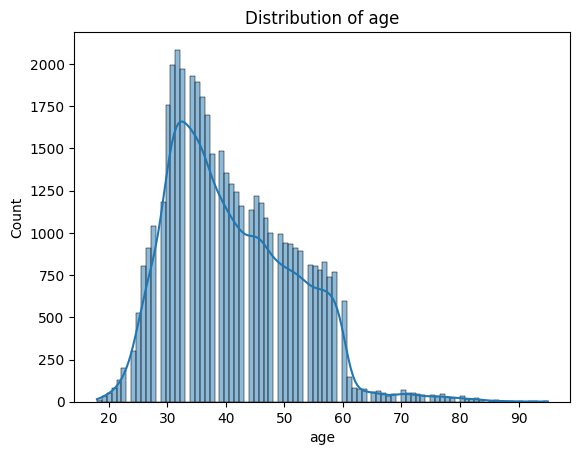

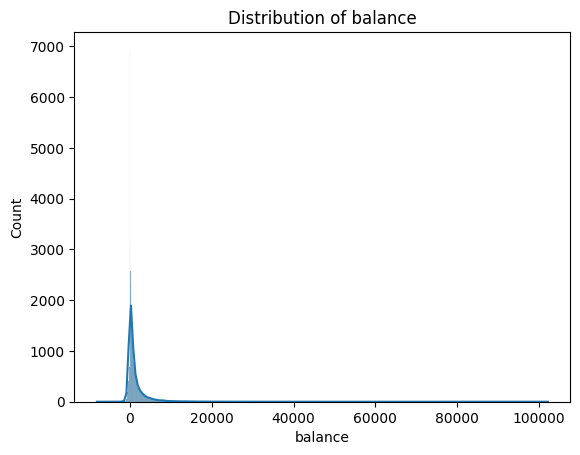

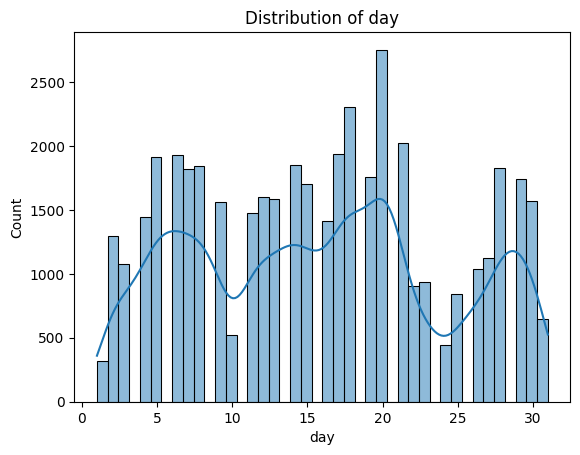

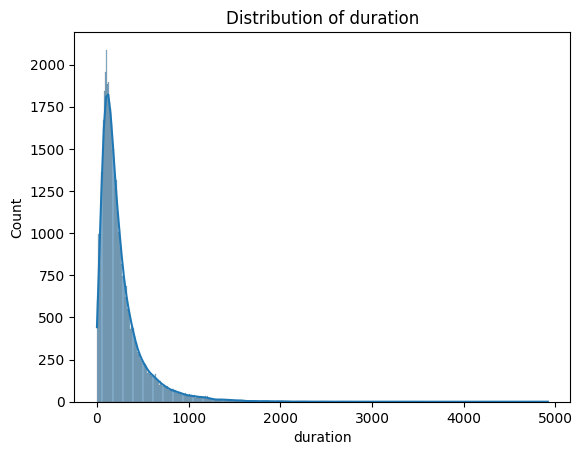

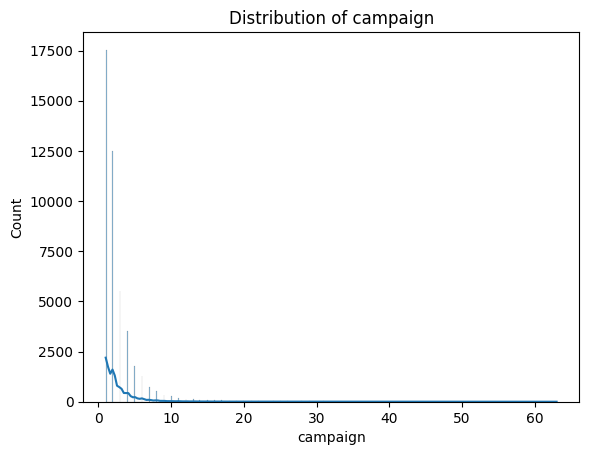

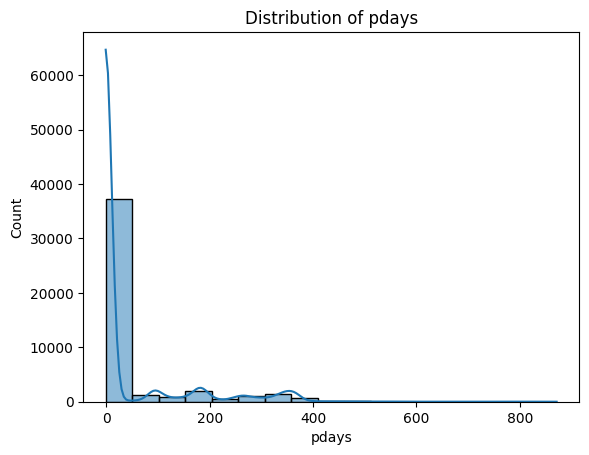

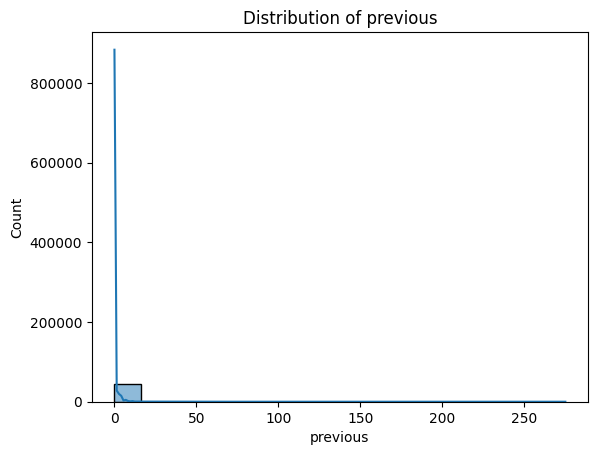

In [7]:
# Step 6: Visualizing Numerical Features
num_cols = df.select_dtypes(include='int64').columns
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

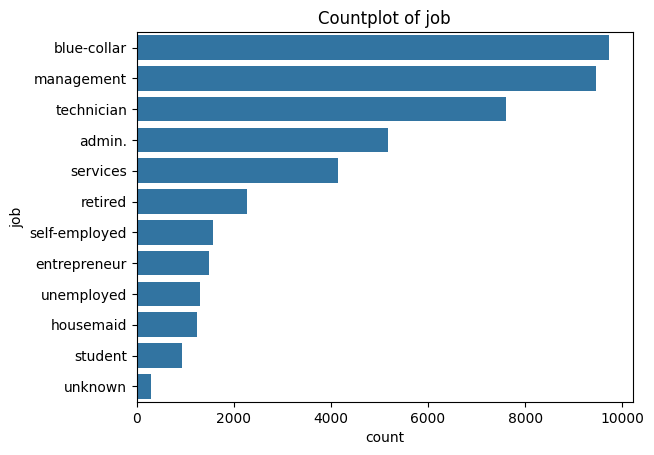

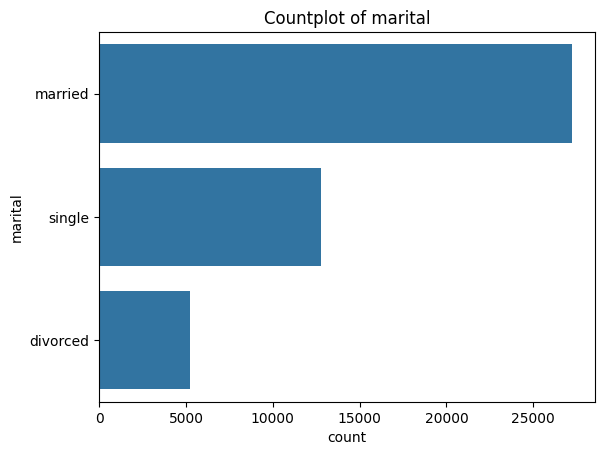

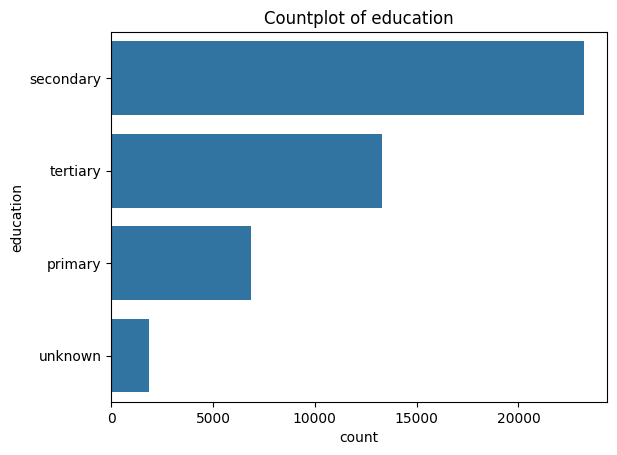

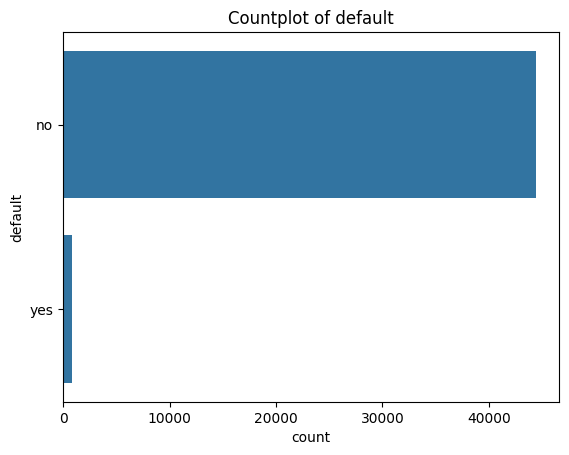

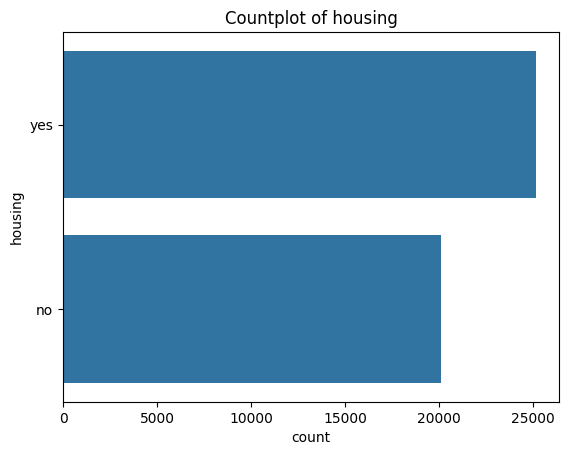

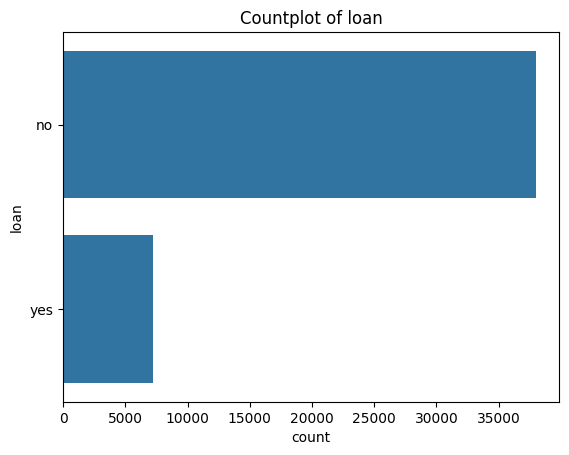

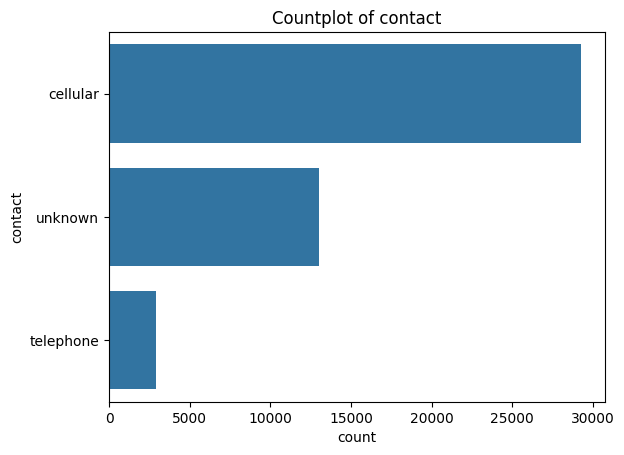

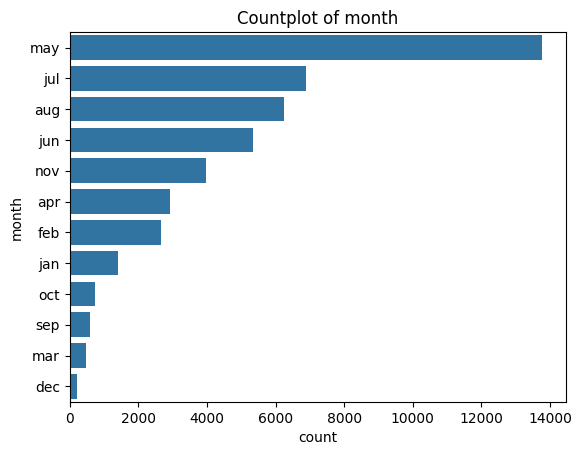

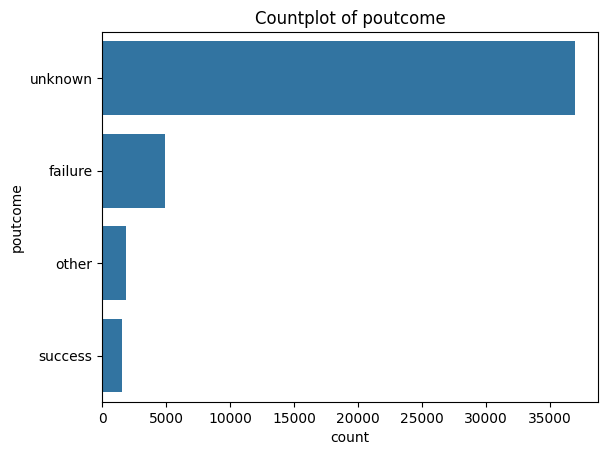

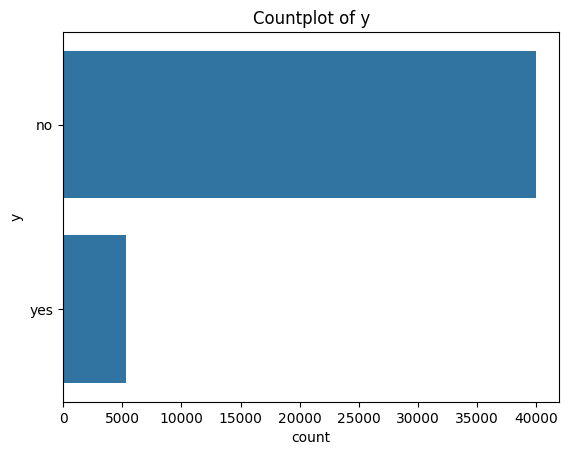

In [8]:
# Step 7: Visualizing Categorical Features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.show()

In [9]:
# Step 8: Outlier Treatment (e.g., Age, Duration)
df = df[df['age'] < 100]
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['duration'] >= Q1 - 1.5 * IQR) & (df['duration'] <= Q3 + 1.5 * IQR)]

In [10]:
# Step 9: Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns.drop('y')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
# Step 10: Encode Target Variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

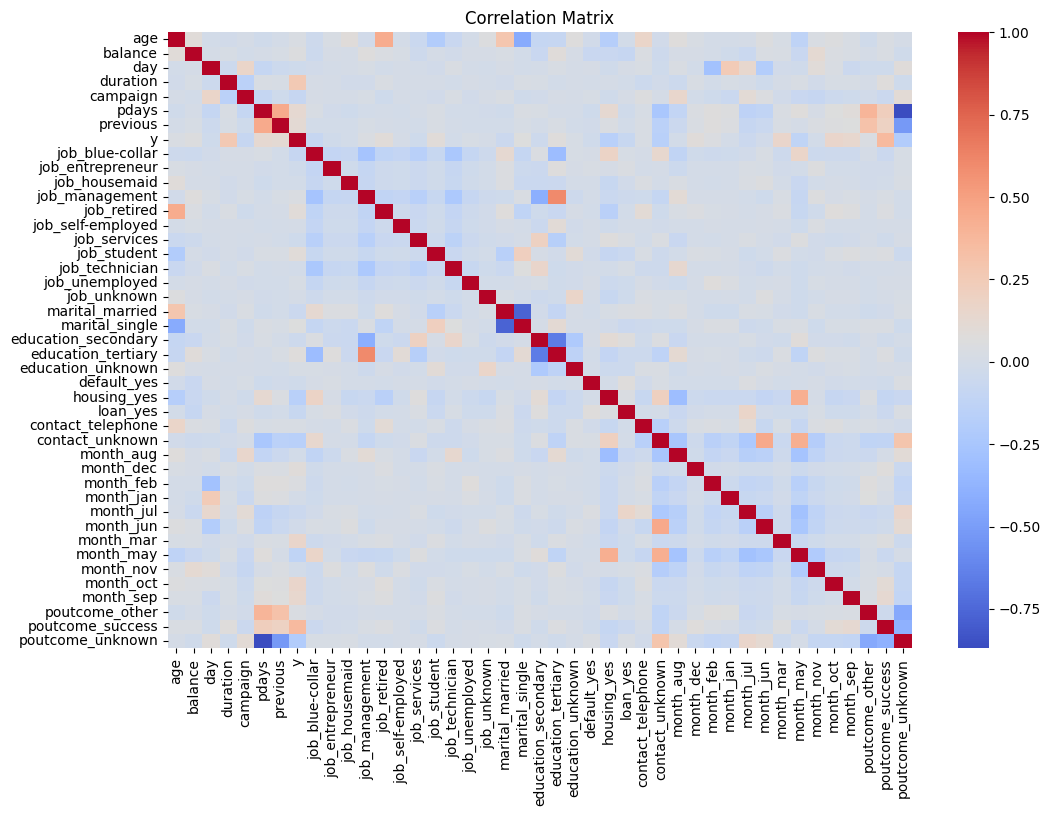

In [12]:
# Step 11: Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [13]:
# Step 12: Split Data into Features and Target
X = df.drop('y', axis=1)
y = df['y']

In [14]:
# Step 13: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Step 14: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression
Accuracy: 0.9269890424011434
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7668
           1       0.66      0.33      0.44       728

    accuracy                           0.93      8396
   macro avg       0.80      0.65      0.70      8396
weighted avg       0.91      0.93      0.92      8396



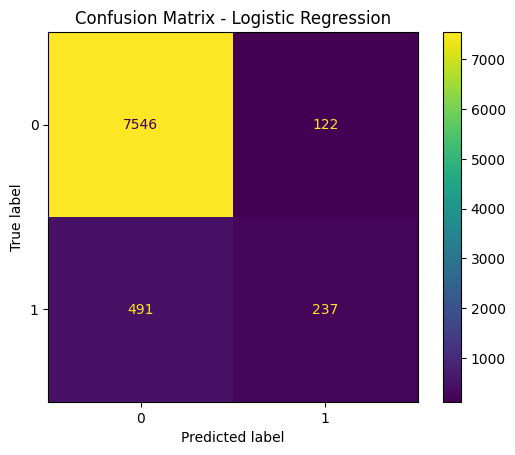


Decision Tree
Accuracy: 0.901143401619819
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7668
           1       0.43      0.44      0.44       728

    accuracy                           0.90      8396
   macro avg       0.69      0.69      0.69      8396
weighted avg       0.90      0.90      0.90      8396



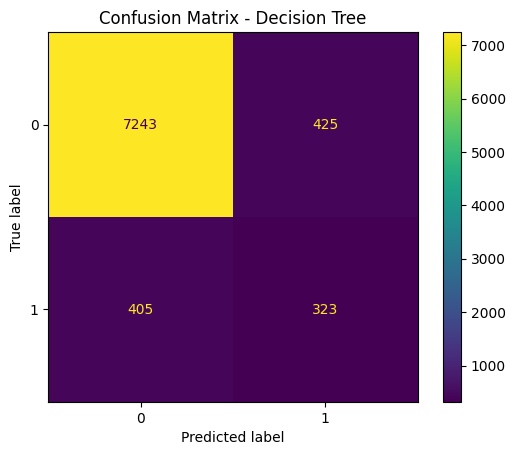


Random Forest
Accuracy: 0.929132920438304
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7668
           1       0.68      0.34      0.45       728

    accuracy                           0.93      8396
   macro avg       0.81      0.66      0.71      8396
weighted avg       0.92      0.93      0.92      8396



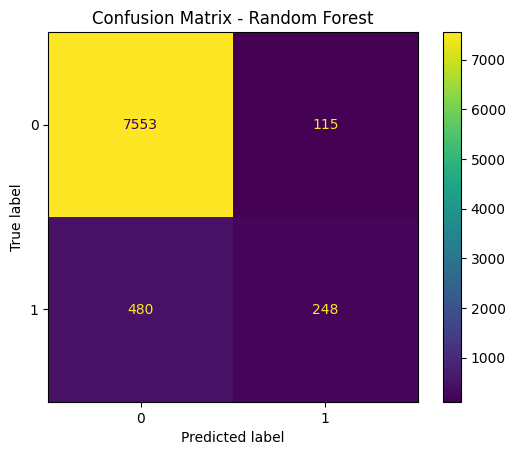


Gradient Boosting
Accuracy: 0.9305621724630777
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7668
           1       0.68      0.37      0.48       728

    accuracy                           0.93      8396
   macro avg       0.81      0.68      0.72      8396
weighted avg       0.92      0.93      0.92      8396



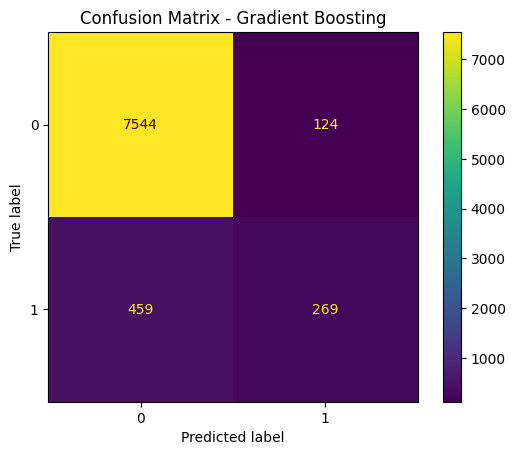


XGBoost
Accuracy: 0.9305621724630777
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7668
           1       0.64      0.45      0.53       728

    accuracy                           0.93      8396
   macro avg       0.80      0.71      0.75      8396
weighted avg       0.92      0.93      0.92      8396



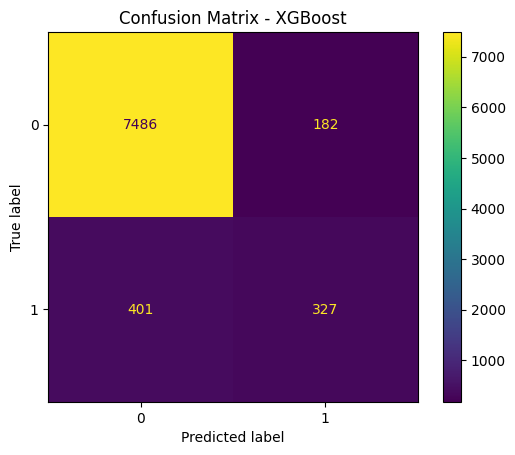

In [ ]:
# Step 15: Train and Evaluate Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'Support Vector Machine': SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [ ]:
# Step 16: ROC Curve Comparison
def get_roc_auc(model, X, y_true):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    return fpr, tpr, auc(fpr, tpr)

plt.figure(figsize=(10, 6))
for name, model in models.items():
    fpr, tpr, auc_val = get_roc_auc(model, X_test_scaled, y_test)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Models")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 17: Feature Importance using XGBoost
importances = pd.Series(models['XGBoost'].feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 Feature Importances – XGBoost")
plt.xlabel("Importance")
plt.show()

In [ ]:
# Step 18: Model Comparison Summary
results_df = pd.DataFrame({
    'Model': list(model_scores.keys()),
    'Accuracy': list(model_scores.values()),
    'AUC': [model_aucs[model] for model in model_scores.keys()]
}).sort_values(by='Accuracy', ascending=False)

print("\nModel Comparison:")
print(results_df)

In [ ]:
# Best Models Summary
print("\n🏆 Based on both accuracy and AUC scores, the best-performing models are:")
print("- Random Forest Classifier")
print("- XGBoost Classifier")
print("These models showed strong predictive power and clearly identified important features influencing customer decisions.")

In [ ]:
# Step 19: Conclusion
print("\n✅ Conclusion:")
print("This project explored the Bank Marketing dataset to understand customer behavior and predict term deposit subscriptions.")
print("Several models were evaluated, with Random Forest and XGBoost performing best based on accuracy and AUC.")
print("Feature importance analysis highlighted key drivers like duration, contact method, and month of contact.")

In [ ]:
Conclusion
Through extensive analysis and preprocessing of the Bank Marketing dataset, multiple machine learning models were implemented and evaluated. Key findings include:

Several models, including Random Forest and XGBoost, achieved strong performance in predicting term deposit subscriptions.

The ROC curve and AUC scores provided deeper insights into model performance beyond accuracy alone.

Feature importance analysis revealed that attributes like duration, month, and contact method significantly influence customer decisions.

This end-to-end workflow demonstrates the power of data-driven marketing and predictive modeling in supporting targeted campaign strategies.